In [37]:
import os
import random
import re
from jieba import posseg as psg
import jieba
import numpy as np
import pandas as pd
import pyecharts
import collections


with open('merge.csv','r')as f:
    comment = f.read()
comment_list = comment.split('\n')
print('>>>累计评论数：%s\n'%len(comment_list))

data1 = []
temp = ['','','','','','','']
for comment in  comment_list:
    comment = comment.split(',')
    if len(comment) == 1:
        temp[6] = comment[0]
        comment = temp
        data1.append(comment)
    elif len(comment)!=7:
        pass
    else:
        data1.append(comment)
data1 = pd.DataFrame(data1,columns=['序号','昵称','性别','时间','内容','点赞','回复'])
string = ''.join(data1['内容'])
word_list = []
stop_words = ['就是','这是','但是','虽然','觉得','还是','弹幕','没有','(',')',]
words = psg.cut(string)
for x in words:
    if x.flag == 'x' :
        pass
    elif len(x.word) == 1:
        pass
    elif x.word in stop_words:
        pass
    else:
        word_list.append(x.word)
#word_list = [word for word in words if word not in stop_words ]
attr = []
value = []
for x in c.most_common(10):
    attr.append(x[0])
    value.append(x[1])


Bar = pyecharts.Bar("评论中出现频率最高的10个词", "统计时间：2019-03-22")
Bar.add("出现次数", attr, value,mark_point=['max'],is_legend_show = False)
Bar

>>>累计评论数：12147



In [41]:
import imageio
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
back_color = imageio.imread('下载.jpg')
words = ' '.join(word_list)
for word in words:
    word = str(word)
    # 正则表达式获取必要数据
    word = re.search('<p>(.*?)</p>',word)

In [42]:
wc = WordCloud(background_color='white',
              max_words=5000,
              mask=back_color,
              max_font_size=200,
              font_path='C:\\Windows\\Fonts\\msyhbd.ttc',  
              random_state=None
              )
wc.generate(words)

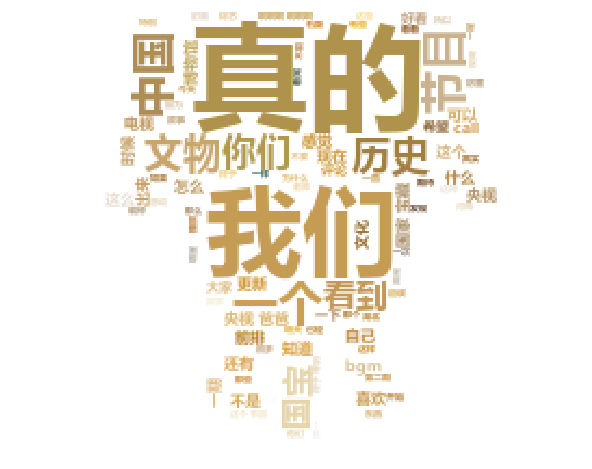

In [43]:
image_colors = ImageColorGenerator(back_color)
plt.figure(figsize = (15,8))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
wc.to_file('comment.png')